# Importing Libraries

In [31]:
import numpy as np
from PIL import Image
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

## **Reading Image**

In [4]:
img = imread(r'pic.jpeg')

In [5]:
img.shape

(1365, 1000, 3)

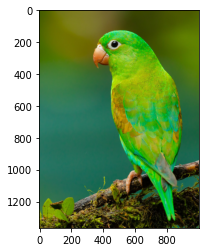

In [11]:
plt.imshow(img)

In [14]:
red = img[...,0]

In [15]:
green=img[...,1]

In [16]:
blue=img[...,2]

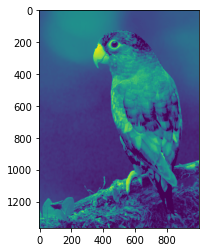

In [21]:
plt.imshow(red)

In [20]:
M1 = np.mean(red.T, axis=1)

In [22]:
M1.shape

(1000,)

In [24]:
M2 = np.mean(green.T, axis=1)
M3 = np.mean(blue.T, axis=1)

In [25]:
print("M2 shape:",M2.shape, " M3 shape:",M3.shape)

M2 shape: (1000,)  M3 shape: (1000,)


In [26]:
C1 = red - M1
C2 = green - M2
C3 = blue - M3

In [27]:
V1 = np.cov(C1.T)
V2 = np.cov(C2.T)
V3 = np.cov(C3.T)

In [28]:
print(V1.shape)

(1000, 1000)


In [29]:
values1, vectors1 = np.linalg.eig(V1)
print(vectors1.shape)

(1000, 1000)


In [30]:
values2, vectors2 = np.linalg.eig(V2)
values3, vectors3 = np.linalg.eig(V3)

# **Taking top 20 components**

In [32]:
numpc = 20

In [33]:
idx1 = np.argsort(values1)[::-1][:numpc]

idx2 = np.argsort(values2)[::-1][:numpc]

idx3 = np.argsort(values3)[::-1][:numpc]


In [34]:
vectors1 = vectors1[:,idx1]
values1 = values1[idx1]
print(vectors1.shape)

(1000, 20)


In [35]:
vectors2 = vectors2[:,idx2]
values2 = values2[idx2]

vectors3 = vectors1[:,idx3]
values3 = values3[idx3]

Text(0, 0.5, 'cumulative explained variance')

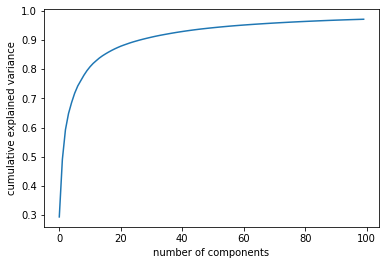

In [36]:
pca = PCA(n_components=100).fit(red)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


In [37]:
p = np.size(vectors1, axis =1)
p

20

In [38]:
print(vectors1.shape)

(1000, 20)


In [39]:
print(V1.shape)

(1000, 1000)


In [40]:
score1 = np.dot(vectors1.T, C1.T)
recon1 = np.dot(score1.T,vectors1.T) + M1 # Normalization
recon_red = np.uint8(np.absolute(recon1)) # TO CONTROL COMPLEX EIGENVALUES

score2 = np.dot(vectors2.T, C2.T)
recon2 = np.dot(score2.T,vectors2.T) + M2 # Normalization
recon_green = np.uint8(np.absolute(recon2)) # TO CONTROL COMPLEX EIGENVALUES

score3 = np.dot(vectors3.T, C3.T)
recon3 = np.dot(score3.T,vectors3.T) + M1 # Normalization
recon_blue = np.uint8(np.absolute(recon3)) # TO CONTROL COMPLEX EIGENVALUES


(1365, 1000)


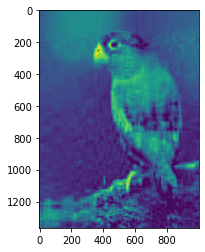

In [41]:
print(recon_red.shape)
plt.imshow(recon_red)

In [42]:
recon_color_img = np.dstack((recon_red, recon_green, recon_blue))

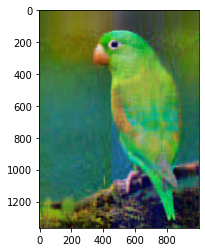

In [43]:
plt.imshow(recon_color_img)

In [45]:
original_fsize = os.path.getsize(r'pic.jpeg')
print(original_fsize)

224552


In [49]:
recon_color_img = Image.fromarray(recon_color_img)

In [50]:
recon_color_img = recon_color_img.save("pic_reduced.jpeg")

In [51]:
recon_fsize = os.path.getsize('pic_reduced.jpeg')
print(recon_fsize)

102417


In [52]:
compression = ((original_fsize-recon_fsize)/original_fsize)*100
print('compression ratio: {}'.format(compression))

compression ratio: 54.39051979051622
